# EDA and Data Visualization on Telecom users dataset

In this notebook we perform some EDA and data visualization on the Telecom users dataset obtained from kaggle: https://www.kaggle.com/radmirzosimov/telecom-users-dataset

-------------------------------------------------------------------------------------------------------------------------------------------------------------

## 0. Import basic libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported!!")

Libraries imported!!


----------------------------------------------------------------------------------------
## 1. Load and read the dataset

Here, we read the dataset and we find the shape of it as well as the colum names.

In [3]:
df = pd.read_csv('telecom_users.csv')
# conversions
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# drop first column
df = df.drop('Unnamed: 0', axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [4]:
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns in the dataset.')

There are 5986 rows and 21 columns in the dataset.


In [5]:
print('The columns of the dataset are the following: ')
for col in df.columns.tolist() :
    print('-', col)

The columns of the dataset are the following: 
- customerID
- gender
- SeniorCitizen
- Partner
- Dependents
- tenure
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn


----------------------------------------------------------------------------------------
## 2. Analyse basic descriptive statistics of the dataset.

Here, we analyse the basic statistics of the attributes.

In [6]:
#get basic statistics of numerical attributes
df.describe(include=[np.number])

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5976.000000
mean,32.468760,64.802213,2298.060617
std,24.516391,30.114702,2274.127165
min,0.000000,18.250000,18.800000
25%,9.000000,35.650000,404.312500
50%,29.000000,70.400000,1412.150000
75%,56.000000,89.900000,3846.962500
max,72.000000,118.750000,8684.800000


In [7]:
#get basic statistics of categorical attributes
df.describe(include=[np.object])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3841-NFECX,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


----------------------------------------------------------------------------------------
## 3. Explore features distribution

Here, we make some plots to get familiar with the features distributions of the dataset.

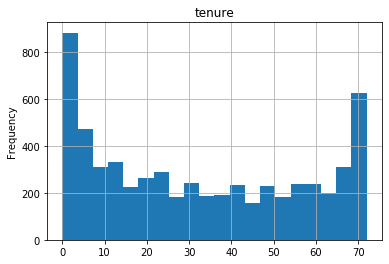

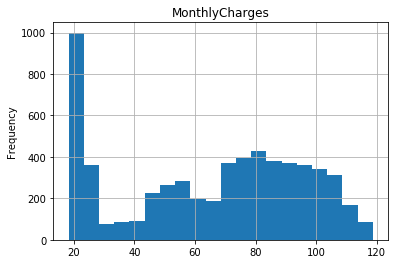

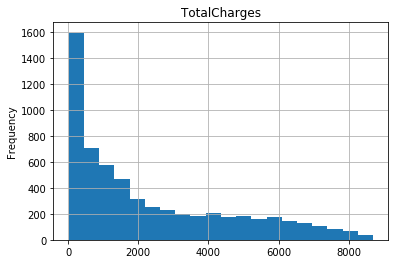

In [8]:
# plot numerical distributions
num_features = ['tenure','MonthlyCharges','TotalCharges']
for f in num_features :
    df[f].plot(kind='hist', bins=20)
    plt.title(f)
    plt.grid()
    plt.show()

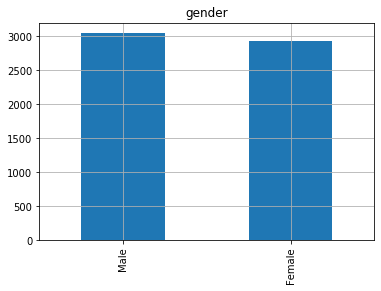

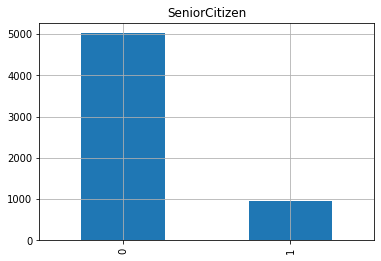

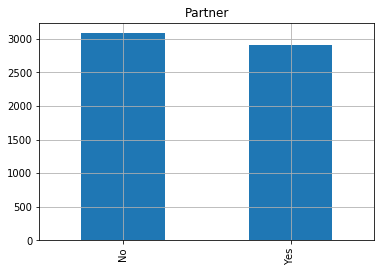

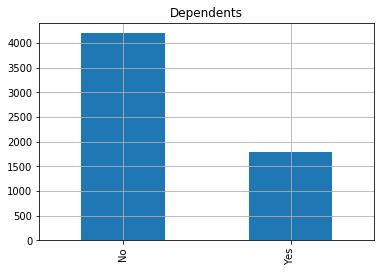

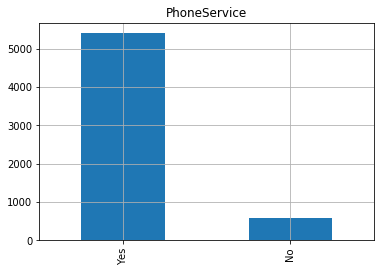

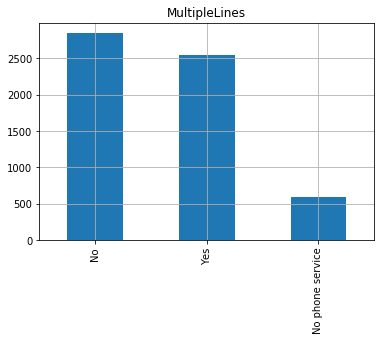

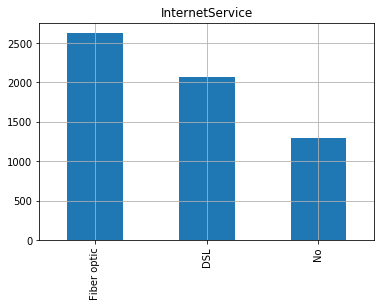

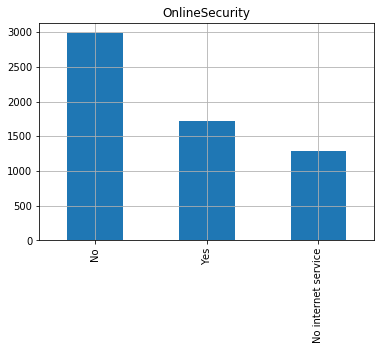

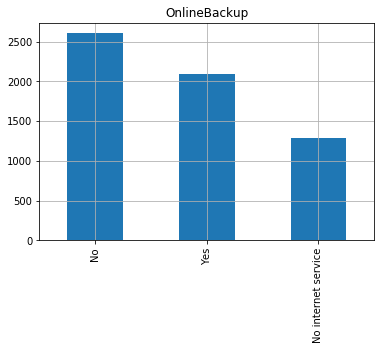

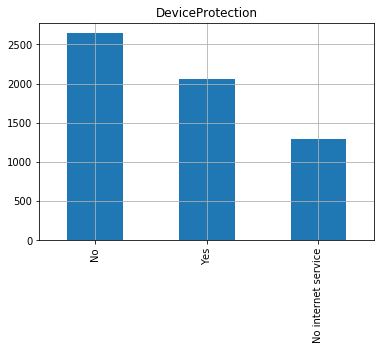

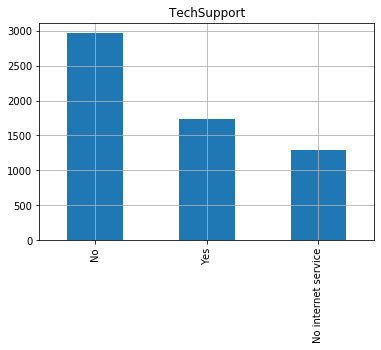

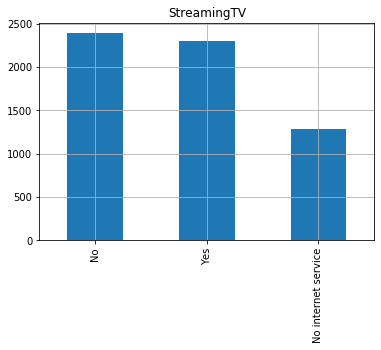

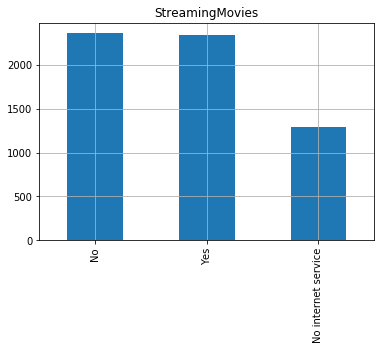

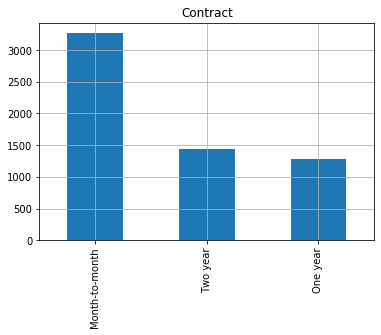

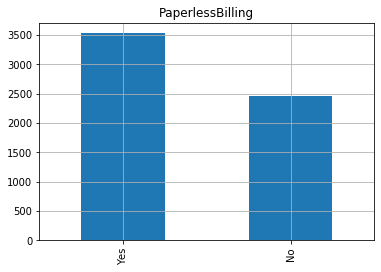

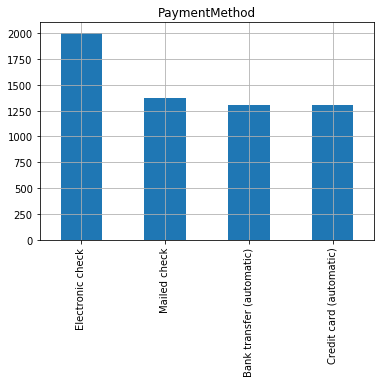

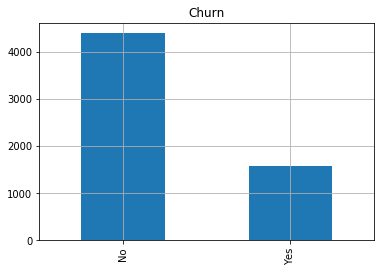

In [20]:
# plot categorical distributions
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']
for f in cat_features :
    df[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

----------------------------------------------------------------------------------------
## 4. Analyse correlations between attributes

Here, we make some heatmaps to represent the correlations between the attributes.

In [21]:
df_copy = df.copy()
for f in cat_features :
    df_copy[f] = df_copy[f].astype('category').cat.codes
df_copy.dtypes

customerID           object
gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                  int8
dtype: object

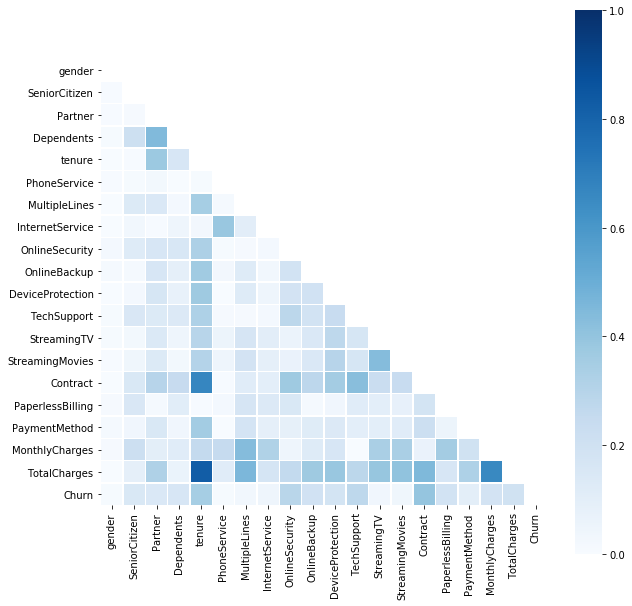

In [22]:
cors = abs(df_copy.corr(method='pearson'))
mask = np.zeros_like(cors, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(10,10))
sns.heatmap(cors, mask=mask, cmap= "Blues", vmax=1, vmin=0, square=True, linewidths=.5)
plt.show()